In [1]:
WORKDIR = '/Odyssey/private/t22picar/2024_DC_WOC-ESA/dc_product_evaluation/DC_product_evaluation/'
import os
import utils_nb
from matplotlib import pyplot
from typing import Tuple, Optional
import velocity_metrics.eulerian.eulerian_drifters as eulerian_drifters
import cartopy

In [2]:
def compare_map(var,ref,to_eval):

        proj = cartopy.crs.PlateCarree()

        dic_p = {'RMSD': {'vmin': 0.1, 'vmax': 0.4, 'cmap': 'YlGnBu_r'},
                'STD': {'vmin': 0.1, 'vmax': 0.4, 'cmap': 'YlGnBu'},
                'Correlation': {'vmin': 0.6, 'vmax':1, 'cmap': 'YlGnBu'},
                'Explained Variance (%)': {'vmin': 50, 'vmax': 85, 'cmap': 'YlGnBu'},
                'Quadratic Error (%)': {'vmin': 30, 'vmax': 65, 'cmap': 'YlGnBu_r'}
                }
        dic_diff = {'RMSD': {'vmin': -0.1, 'vmax': 0.1, 'cmap': 'RdBu_r'},
                'STD': {'vmin': -0.1, 'vmax': -0., 'cmap': 'YlGnBu'},
                'Correlation': {'vmin': -0.15, 'vmax':0.15, 'cmap': 'RdBu'},
                'Explained Variance (%)': {'vmin': -20, 'vmax': 20, 'cmap':'RdBu'},
                'Quadratic Error (%)': {'vmin': -20, 'vmax': 20, 'cmap': 'RdBu_r'}
                }
        ind = 0

        print(f'Diagnostic {var}')
        #print(listdir)
        dic_p = dic_diff
        #ref = listdir[2]
        print(f"ref : {os.path.splitext(os.path.basename(ref))[0]}")
        print(f"to eval : {os.path.splitext(os.path.basename(to_eval))[0]}")
        #print(f'{os.path.splitext(os.path.basename(ref))[0].split('_')[2:]} vs {os.path.splitext(os.path.basename(file))[0].split('_')[2:]}')

        title_ref = os.path.splitext(os.path.basename(ref))[0]
        title_ref = title_ref.split('_')
        title_ref = '_'.join(title_ref[2:])

        title_eval = os.path.splitext(os.path.basename(to_eval))[0]
        title_eval = title_eval.split('_')
        title_eval = '_'.join(title_eval[2:])

        #for file in to_eval:
        bn =  os.path.dirname(to_eval)
        title = os.path.splitext(os.path.basename(to_eval))[0]
        title_list = title.split('_')
        title = '_'.join(title_list[2:])
        fig = eulerian_drifters.plot_bin_diff(to_eval, ref, bn, var,
                                        box=None, #[-5, 11, 35, 43],
                                        vmin=dic_p[var]['vmin'],
                                        vmax=dic_p[var]['vmax'],
                                        cmap=dic_p[var]['cmap'],
                                        proj=proj)
        fig.suptitle(f'{var} {title_ref} (ref) vs {title_eval}') 

Diagnostic Correlation
ref : Eulerian_BINNED_008_047
to eval : Eulerian_BINNED_neurost_sst_ssh_15m_10th


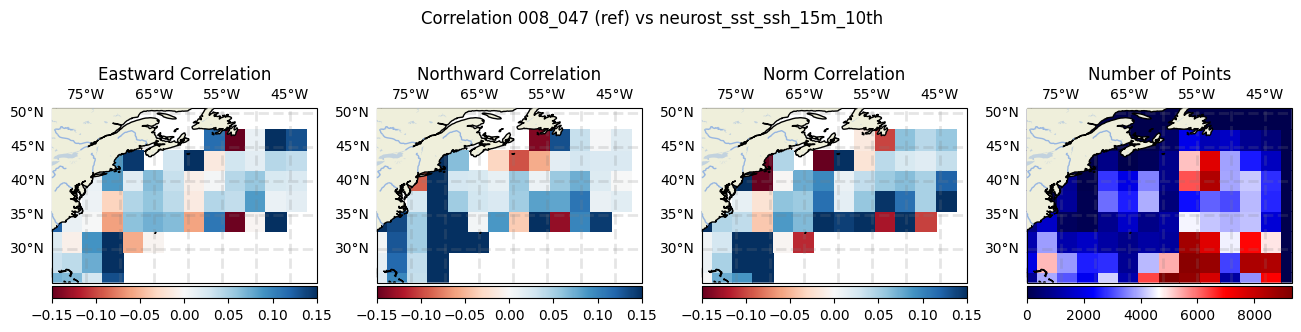

In [3]:
# Comparer 4-2 ; 0-3
list_region=['GulfStream']

for region in list_region:
     #region = 'Mediterranean'
     depth = '15'
     idir = os.path.join(WORKDIR, 'eulerian_rms')
     listdir = utils_nb.make_list_eulerian(idir, region, depth)
     listvar = ('RMSD',  'Correlation', 'Explained Variance (%)', 'Quadratic Error (%)')
     var = 'Correlation'

     #for listdir_item in listdir:
     #     print(os.path.splitext(os.path.basename(listdir_item))[0])
     ref = listdir[0]

     base_output="../rec"
     xp_name="neurost_sst_ssh_15m_10th"
     if region=='T1':
          region='Agulhas'
          to_eval = f"{base_output}/{xp_name}/metric_15m/{region}/Eulerian_BINNED_{xp_name}.pyo"
     else:
          to_eval = f"{base_output}/{xp_name}/metric_15m/{region}/Eulerian_BINNED_{xp_name}.pyo"

     compare_map(var,ref,to_eval)

Diagnostic Correlation
ref : Eulerian_BINNED_unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_neurost
to eval : Eulerian_BINNED_unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_neurost_RonanUnet


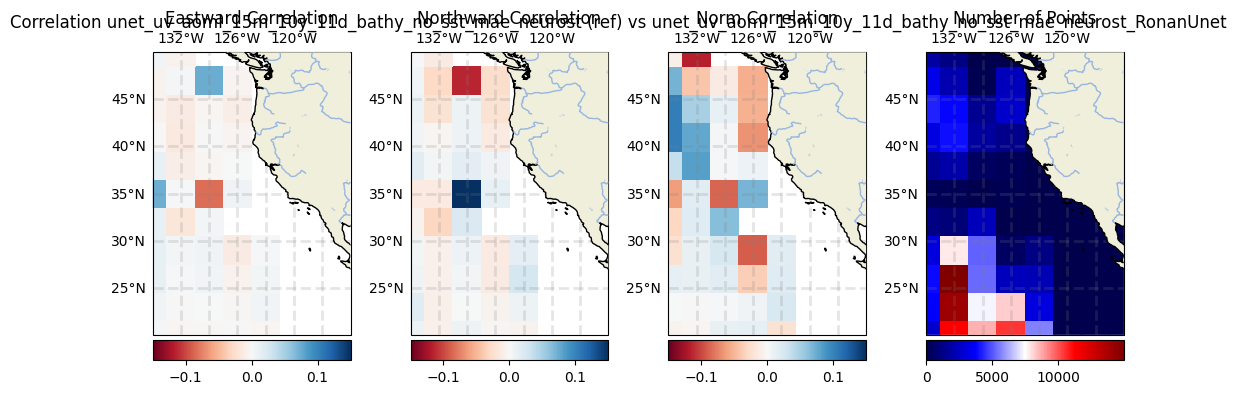

In [8]:
# Comparer 4-2 ; 0-3
base_output="../rec"
list_region=['California']

depth = '15'
listvar = ('RMSD',  'Correlation', 'Explained Variance (%)', 'Quadratic Error (%)')
#var = 'Quadratic Error (%)'
#var = 'Correlation'
var = 'Correlation'
for region in list_region:

     #ref = listdir[0]
     xp_name="unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_neurost" #"neurost_sst_ssh_15m_4th" #"unet_uv_drifters_aoml_15m_10y_11d_bathy_no_sst" #"neurost_sst_ssh_15m_8th"
     if region=='T1':
          region='Agulhas'
          ref = f"{base_output}/{xp_name}/metric_15m/{region}/Eulerian_BINNED_{xp_name}.pyo"
     else:
          ref = f"{base_output}/{xp_name}/metric_15m/{region}/Eulerian_BINNED_{xp_name}.pyo"


     xp_name='unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_neurost_RonanUnet'#"ssh_duacs_sst_w_to_u_v_11d_15m"
     if region=='T1':
          region='Agulhas'
          to_eval = f"{base_output}/{xp_name}/metric_15m/{region}/Eulerian_BINNED_{xp_name}.pyo"
     else:
          to_eval = f"{base_output}/{xp_name}/metric_15m/{region}/Eulerian_BINNED_{xp_name}.pyo"

     compare_map(var,ref,to_eval)

Diagnostic Correlation
ref : Eulerian_BINNED_drifters_unet_15m_cmems_ugos
to eval : Eulerian_BINNED_drifters_unet_15m_aoml_ugos
Diagnostic Correlation
ref : Eulerian_BINNED_drifters_unet_15m_cmems_ugos
to eval : Eulerian_BINNED_drifters_unet_15m_aoml_ugos
Diagnostic Correlation
ref : Eulerian_BINNED_drifters_unet_15m_cmems_ugos
to eval : Eulerian_BINNED_drifters_unet_15m_aoml_ugos


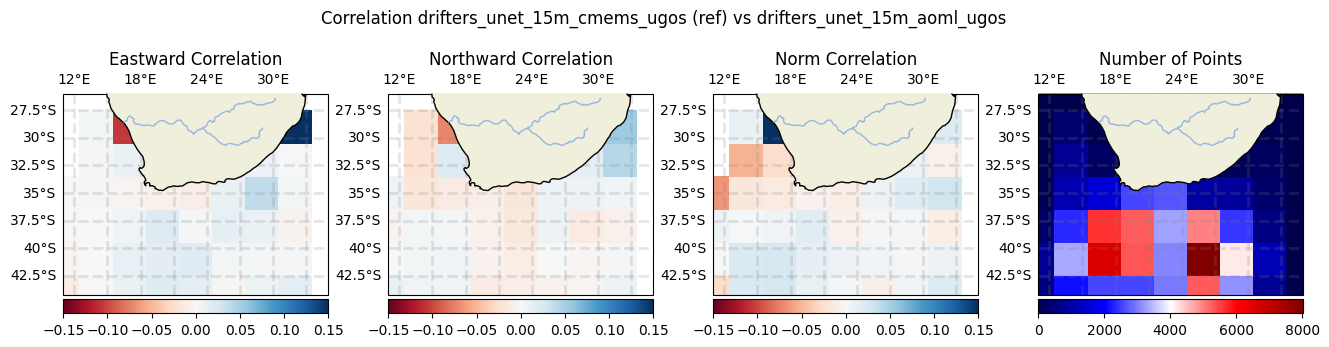

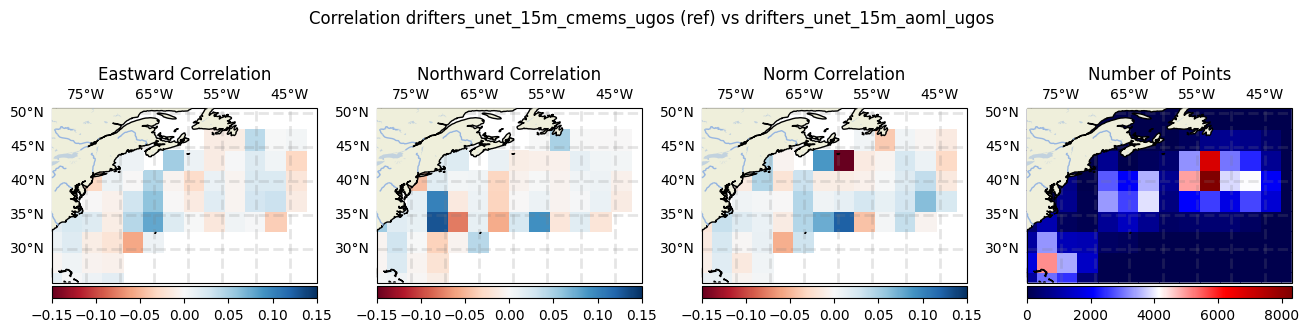

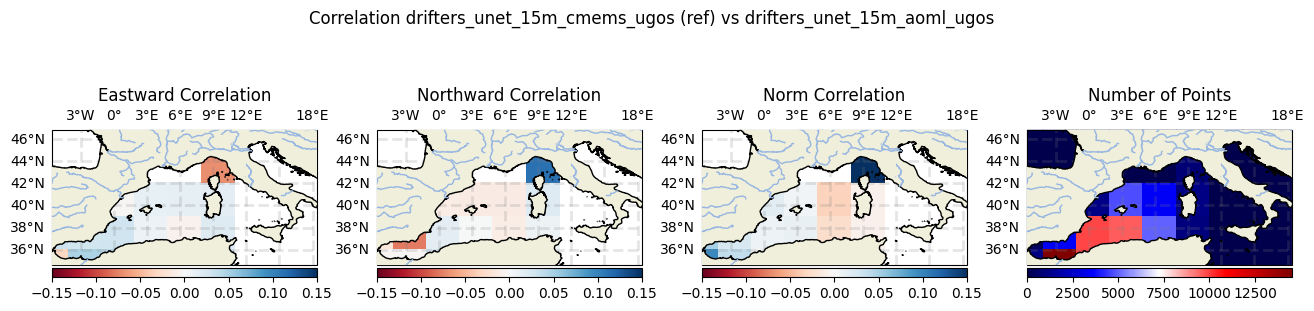

In [26]:
# Comparer 4-2 ; 0-3
list_region=['T1','GulfStream','Mediterranean']

depth = '15'
idir = os.path.join(WORKDIR, 'eulerian_rms')
listdir = utils_nb.make_list_eulerian(idir, region, depth)
listvar = ('RMSD',  'Correlation', 'Explained Variance (%)', 'Quadratic Error (%)')
var = 'Quadratic Error (%)'
var = 'Correlation'

for region in list_region:

     #ref = listdir[0]
     xp_name="drifters_unet_15m_cmems_ugos"
     if region=='T1':
          region='Agulhas'
          ref = f"{base_output}/{xp_name}/metric/{region}/Eulerian_BINNED_{xp_name}.pyo"
     else:
          ref = f"{base_output}/{xp_name}/metric/{region}/Eulerian_BINNED_{xp_name}.pyo"

     base_output="../rec"
     xp_name="drifters_unet_15m_aoml_ugos"
     if region=='T1':
          region='Agulhas'
          to_eval = f"{base_output}/{xp_name}/metric/{region}/Eulerian_BINNED_{xp_name}.pyo"
     else:
          to_eval = f"{base_output}/{xp_name}/metric/{region}/Eulerian_BINNED_{xp_name}.pyo"

     compare_map(var,ref,to_eval)